# Символьное отображение

Логарифмические доходности Yandex, Tinkoff в матрицу переходов

In [1]:
import requests
import apimoex
import pandas as pd
import sys
import numpy as np
import networkx as nx
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'SBER')
    sber= pd.DataFrame(data)
    sber.set_index('TRADEDATE', inplace=True)
    print(sber.head(), '\n')
    #rint(df.tail(), '\n')
    #df.info()

           BOARDID  CLOSE   VOLUME        VALUE
TRADEDATE                                      
2013-03-25    TQBR  98.79   593680   59340002.8
2013-03-26    TQBR  97.20  1283550  126030358.8
2013-03-27    TQBR  96.75  1261950  121835900.2
2013-03-28    TQBR  98.59  1971410  192469794.9
2013-03-29    TQBR  98.76   782000   77268860.1 



In [3]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GAZP')
    gazp = pd.DataFrame(data)
    gazp.set_index('TRADEDATE', inplace=True)
    print(gazp.head(), '\n')


           BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2014-06-09    TQBR  144.40  40347300  5.851239e+09
2014-06-10    TQBR  144.75  41460990  5.956067e+09
2014-06-11    TQBR  146.40  39418520  5.725373e+09
2014-06-16    TQBR  145.20  77165360  1.113453e+10
2014-06-17    TQBR  144.77  44370530  6.436430e+09 



In [4]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GMKN')
    gmkn= pd.DataFrame(data)
    gmkn.set_index('TRADEDATE', inplace=True)
    print(gmkn.head(), '\n')

           BOARDID   CLOSE  VOLUME       VALUE
TRADEDATE                                     
2014-06-09    TQBR  7029.0  212826  1496171686
2014-06-10    TQBR  6900.0  207612  1441391215
2014-06-11    TQBR  6940.0  207715  1434679352
2014-06-16    TQBR  6649.0  520423  3453075583
2014-06-17    TQBR  6622.0  219261  1448175391 



In [5]:
sber=sber[-504:-252]
gazp=gazp[-504:-252]
gmkn=gmkn[-504:-252]
gmkn

,BOARDID,CLOSE,VOLUME,VALUE
TRADEDATE,,,,
2020-10-06,TQBR,18782.0,363433,6939990822
2020-10-07,TQBR,18654.0,261206,4885021824
2020-10-08,TQBR,18924.0,203877,3824836128
2020-10-09,TQBR,19450.0,410354,7916168452
2020-10-12,TQBR,19534.0,323827,6356849966
...,...,...,...,...
2021-09-24,TQBR,22856.0,206448,4730771150
2021-09-27,TQBR,22712.0,162629,3695703898
2021-09-28,TQBR,22324.0,273134,6139047698


In [6]:
def log_profability(df):
    max_log=0
    graph_ln=[]
    graph_ln.append(0.1)
    for i in range(1,len(df)):
        graph_ln.append(np.log(df.iloc[i][1]/df.iloc[i-1][1]))
        if abs(np.log(df.iloc[i][1]/df.iloc[i-1][1])>max_log):
            max_log=abs(np.log(df.iloc[i][1]/df.iloc[i-1][1]))
    for i in range(len(graph_ln)):
        graph_ln[i]=(abs(graph_ln[i]/max_log)+1)/2-0.5
    return graph_ln

In [7]:
sber_prof=log_profability(sber)
gazp_prof=log_profability(gazp)
gmkn_prof=log_profability(gmkn)


Построение матрицы переходов

In [8]:
def statement(dataset):
    max_dif = 0
    for i in range(len(dataset)-1):
        if abs(dataset[i+1]-dataset[i])>max_dif:
            max_dif=np.abs(dataset[i+1]-dataset[i])
    dif= []
    for i in range(len(dataset)-1):
        if dataset[i+1]-dataset[i]> 0.5*max_dif:
            dif.append('R')
        elif dataset[i+1]-dataset[i]> 0.05*max_dif and dataset[i+1]-dataset[i]< 0.5*max_dif:
            dif.append('r')
        elif dataset[i+1]-dataset[i]> -0.05*max_dif and dataset[i+1]-dataset[i]<0.05*max_dif:
            dif.append('e')
        elif dataset[i+1]-dataset[i]> -0.5*max_dif and dataset[i+1]-dataset[i]< -0.05*max_dif:
            dif.append('d') 
        elif dataset[i+1]-dataset[i]< 0.5*max_dif:
            dif.append('D')
    return (dif)

In [9]:
stat = []
for i in range(len(sber_prof)-1):
    stat.append((statement(sber_prof)[i], statement(gazp_prof)[i], statement(gmkn_prof)[i]))

In [10]:
len(stat)

251

In [11]:
def transition_matrix_order1(data):
    alphabet = []
    for element in data:
        if element not in alphabet:
            alphabet.append(element)
    alphabet.sort()
    
    previous = data[0]
    matrix = pd.DataFrame(0.0, index=alphabet, columns=alphabet)
    
    for i in data[1:]:
        matrix[i][previous]    += 1.0
        previous = i
    
    total = matrix.sum()
    for element in alphabet:
        matrix[element] = matrix.div(total[element])[element]
    
    return matrix#, alphabet

In [12]:
trans_matrix=transition_matrix_order1(stat)
trans_matrix

,"(D, D, D)","(d, D, D)","(d, d, d)","(d, d, e)","(d, d, r)","(d, e, d)","(d, e, e)","(d, e, r)","(d, r, d)","(d, r, e)",...,"(r, d, d)","(r, d, e)","(r, d, r)","(r, e, D)","(r, e, d)","(r, e, e)","(r, e, r)","(r, r, d)","(r, r, e)","(r, r, r)"
"(D, D, D)",NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.083333,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
"(d, D, D)",NaN,0.0,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
"(d, d, d)",NaN,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,...,0.000000,0.0,0.000000,0.0,0.142857,0.222222,0.000,0.000000,0.000000,0.166667
"(d, d, e)",NaN,0.0,0.000000,0.0,0.142857,0.000000,0.111111,0.0,0.083333,0.181818,...,0.000000,0.0,0.000000,0.0,0.142857,0.000000,0.000,0.000000,0.000000,0.166667
"(d, d, r)",NaN,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,...,0.000000,0.1,0.000000,0.0,0.000000,0.000000,0.000,0.111111,0.111111,0.166667
"(d, e, d)",NaN,0.0,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.111111,0.000,0.111111,0.111111,0.166667
"(d, e, e)",NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,...,0.000000,0.0,0.000000,0.0,0.000000,0.111111,0.250,0.000000,0.000000,0.000000
"(d, e, r)",NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,...,0.166667,0.1,0.000000,1.0,0.000000,0.000000,0.125,0.000000,0.111111,0.000000
"(d, r, d)",NaN,0.0,0.000000,0.1,0.142857,0.000000,0.000000,0.0,0.000000,0.090909,...,0.000000,0.1,0.083333,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
"(d, r, e)",NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.166667,0.1,0.250000,0.0,0.000000,0.000000,0.000,0.111111,0.111111,0.000000


Ориентированный граф

In [13]:
graph=nx.DiGraph()
graph=nx.from_numpy_array(np.array(trans_matrix))

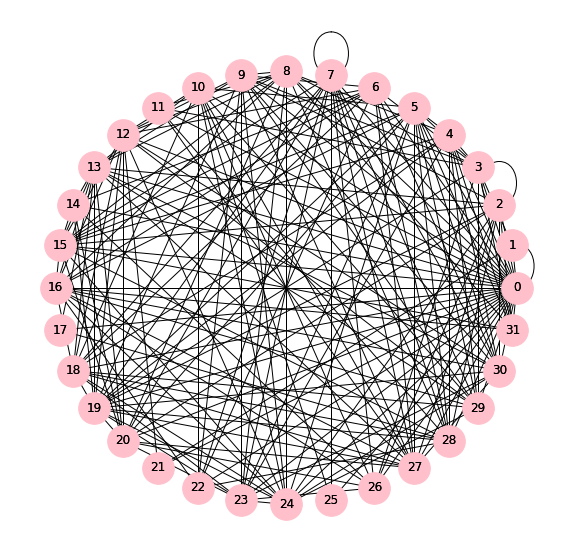

In [24]:
g=nx.DiGraph()
g=nx.from_numpy_array(np.array(trans_matrix))
pos = nx.circular_layout(g)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_labels(g, pos)
nx.draw_circular(g, with_labels=True, node_size=1000, node_color='pink')
plt.show()

Вычислите центральность по промежуточности (x) и центральность собственного вектора (y), постройте линейную регрессию y=f(x), наложите на график 90% доверительный интервал и определите наиболее важные состояния сети (important states, gate keeper).

In [15]:
print(f'Diameter : {nx.diameter(g)}\n\
Radius : {nx.radius(g)},\n\
Density : {nx.density(g)},\n\
Transitivity : {nx.transitivity(g)},\n\
Mean vertexes degree : {np.mean(list(g.degree()))}')
print(f'Центр : {nx.center(g)}')
print(f'Периферийные вершины : {nx.periphery(g)}')

Diameter : 2
Radius : 1,
Density : 0.3850806451612903,
Transitivity : 0.4662080129502226,
Mean vertexes degree : 13.71875
Центр : [0]
Периферийные вершины : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


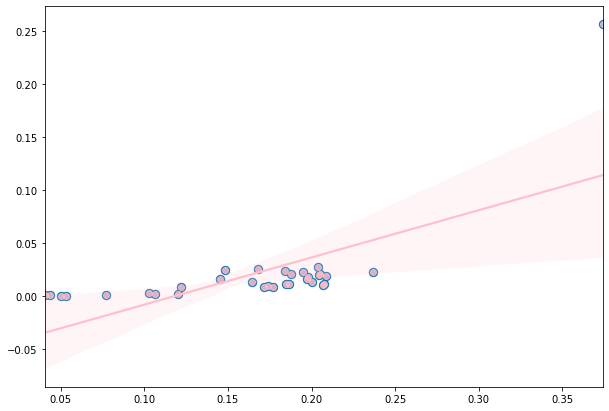

In [26]:
g=graph
nx.degree_centrality(g)
import seaborn as sns
sns.color_palette("Spectral", as_cmap=True)

центральность_по_промежуточности_x = nx.betweenness_centrality(g)
центральность_собственного_вектора_y = nx.eigenvector_centrality(g)

fig, ax = plt.subplots(figsize=(10, 7))

plt.scatter(list(центральность_собственного_вектора_y.values()), 
            list(центральность_по_промежуточности_x.values()),s=70)
   
ax = sns.regplot(x=list(центральность_собственного_вектора_y.values()), 
                y=list(центральность_по_промежуточности_x.values()), ci=90, color='pink')